<a href="https://colab.research.google.com/github/BecomeAllan/RNN/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório

## Implementações com RNNs

### Bibliotecas

In [194]:
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import os
import time

!pip install unidecode
from unidecode import unidecode
tf.config.list_physical_devices('GPU')

[]

## Tratamento de dados

In [120]:
# Baixar dataset
!gdown --id 15FhPHu7Hx6ul_k-EEBZwzpUWznK0gBR3


Downloading...
From: https://drive.google.com/uc?id=15FhPHu7Hx6ul_k-EEBZwzpUWznK0gBR3
To: /content/portuguese-poems.csv
13.3MB [00:00, 31.9MB/s]


In [183]:
# Data1
df1 = pd.read_csv("portuguese-poems.csv", encoding='UTF-8')

df1 = df1.dropna()


df1.head()


,Author,Title,Content,Views
0,Cecília Meireles,retrato,"eu nao tinha este rosto de hoje,\r\nassim calm...",1018431
1,Fernando Pessoa,"para ser grande, se inteiro: nada","para ser grande, se inteiro: nada\r\nteu exage...",1979413
2,Marina Colasanti,"eu sei, mas nao devia",eu sei que a gente se acostuma. mas nao devia....,301509
3,Carlos Drummond de Andrade,quadrilha,joao amava teresa que amava raimundo\r\nque am...,1421206
4,Eugénio de Andrade,e urgente o amor,e urgente o amor.\r\ne urgente um barco no mar...,621197


In [212]:
df1['Title'] = df1['Title'].apply(unidecode).str.lower()
df1['Content'] = df1['Content'].apply(unidecode).str.lower()



# Junta todos os conteudos em uma string
Content_joined = "\n\n".join(df1['Content'])

# unicos caracteres
vocab = sorted(set(Content_joined))

# Transforma em um dict
char2idx = {u:i for i, u in enumerate(vocab)}

# Mapeia as letras em posições
idx2char = np.array(vocab)

# Transforma uma string em um array de idxs
def vectorize_string(string):
  vectorized_output = np.array([char2idx[char] for char in string])
  return vectorized_output


vectorized_songs = vectorize_string(Content_joined[0:30])
print(vectorized_songs)


[46 62  3 55 42 56  3 61 50 55 49 42  3 46 60 61 46  3 59 56 60 61 56  3
 45 46  3 49 56 51]


In [185]:
print(idx2char[vectorized_songs])

['e' 'u' ' ' 'n' 'a' 'o' ' ' 't' 'i' 'n' 'h' 'a' ' ' 'e' 's' 't' 'e' ' '
 'r' 'o' 's' 't' 'o' ' ' 'd' 'e' ' ' 'h' 'o' 'j']


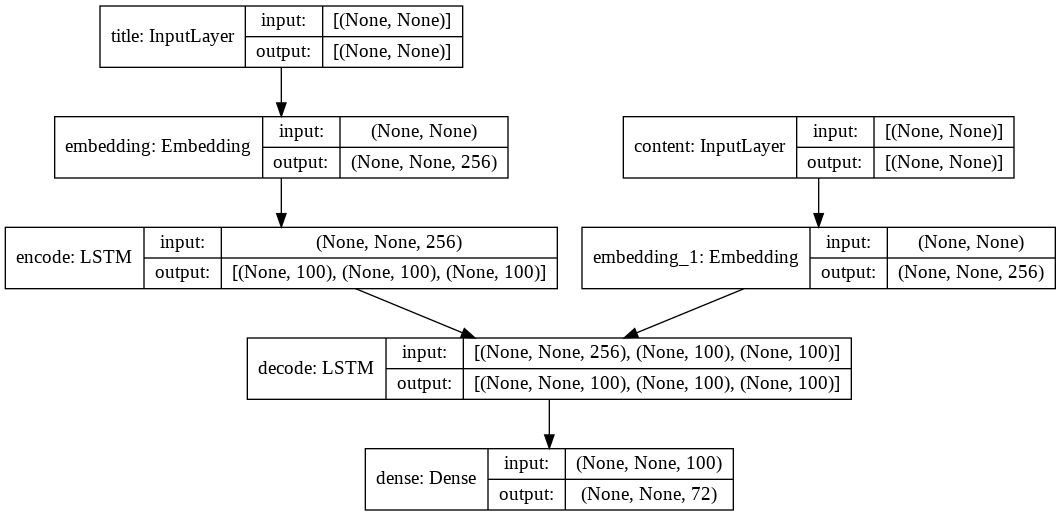

In [221]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024


## Encoder
encode_input = keras.Input(shape=(None,), name="title")
encode_features = layers.Embedding(vocab_size, embedding_dim)(encode_input) 
encoder = layers.LSTM(100, return_state=True, name = 'encode')
encode_output, state_h, state_c = encoder(encode_features)

# Estado da celula 
encoder_state = [state_h, state_c]




## Decoder
decode_input = keras.Input(shape=(None,), name="content")
decode_features = layers.Embedding(vocab_size, embedding_dim)(decode_input)
decode = layers.LSTM(100, return_state=True, return_sequences=True, name = 'decode')
decode_out, _, _ = decode(decode_features, initial_state = encoder_state)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(decode_out)

# Estado da celula 


model = keras.Model([encode_input, decode_input], decoder_outputs)
model.summary()

keras.backend.clear_session()

keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [225]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss = "categorical_crossentropy"
)
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

model([vectorized_songs[1:10],vectorized_songs[5:10] ])

ValueError: ignored